In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## problem 2-1

In [129]:
#read file
csv2019 = pd.read_excel("EconomicIndicators2019.xlsx")
csv2019.head()

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,63.565,500.522981,1331.48,4872.44,11238.83,74.234104,37.77
1,2,Albania,Europe,79.282,5396.214227,963.57,2832.29,4993.30,NaN,2.85
2,3,Algeria,Africa,76.474,4021.983608,40980.38,21189.60,170582.40,250.560776,42.71
3,4,Angola,Africa,62.448,2142.238757,4253.81,5463.38,24382.90,69.379341,32.35
4,5,Antigua and Barbuda,North America,78.691,18187.779712,37.48,29.25,509.00,801.543823,0.09


In [130]:
#check whether there're any problem with the data
duplicates = csv2019.duplicated().sum()
print(duplicates)
negative= (csv2019[['GDPPC', 'MfgMn$', 'AgriMn$', 'CO2kt', 'HealthPC$', 'Pop_mn']] < 0).sum()
print(negative)   
#no problem here.

0
GDPPC        0
MfgMn$       0
AgriMn$      0
CO2kt        0
HealthPC$    0
Pop_mn       0
dtype: int64


In [131]:
#Find out there's non-organized string.
continents = csv2019['Continent'].unique() 
continents

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania', 'EuRope', 'Asi', 'ASIA', 'Euro', 'N America', 'Afric'],
      dtype=object)

In [132]:
# continents = Asia, Europe, Africa, North America, South America, Oceania
continent_mapping = {
    'Asia': 'Asia', 'ASIA': 'Asia', 'Asi': 'Asia',
    'Europe': 'Europe', 'EuRope': 'Europe', 'Euro': 'Europe',
    'Africa': 'Africa', 'Afric': 'Africa',
    'North America': 'North America', 'N America': 'North America',
    'South America': 'South America',
    'Oceania': 'Oceania'
}

csv2019['Continent'] = csv2019['Continent'].map(continent_mapping)
continents = csv2019['Continent'].unique()
continents     
# now organized

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

In [133]:
csv2019.info()  # have missing values in  CO2kt and HealthPC$
# 177, don't have enough data so no machine learning.
# choosing mean or median to replace missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


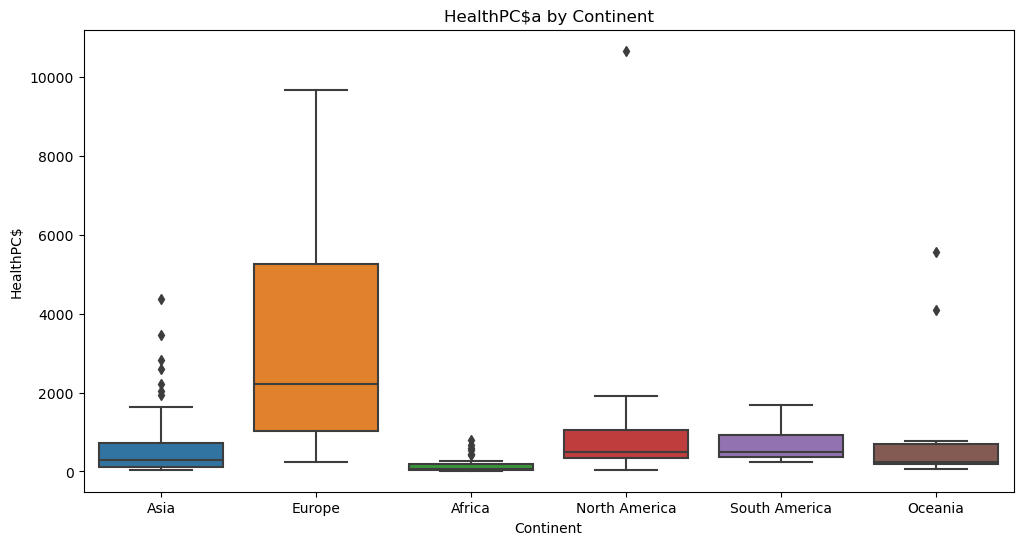

In [134]:
#lots of outliers, use median of each continent to replace missing data.
plt.figure(figsize=(12, 6))
sns.boxplot(x="Continent", y="HealthPC$", data=csv2019)
plt.title('HealthPC$a by Continent')
plt.xlabel('Continent')
plt.ylabel('HealthPC$')
plt.show()  

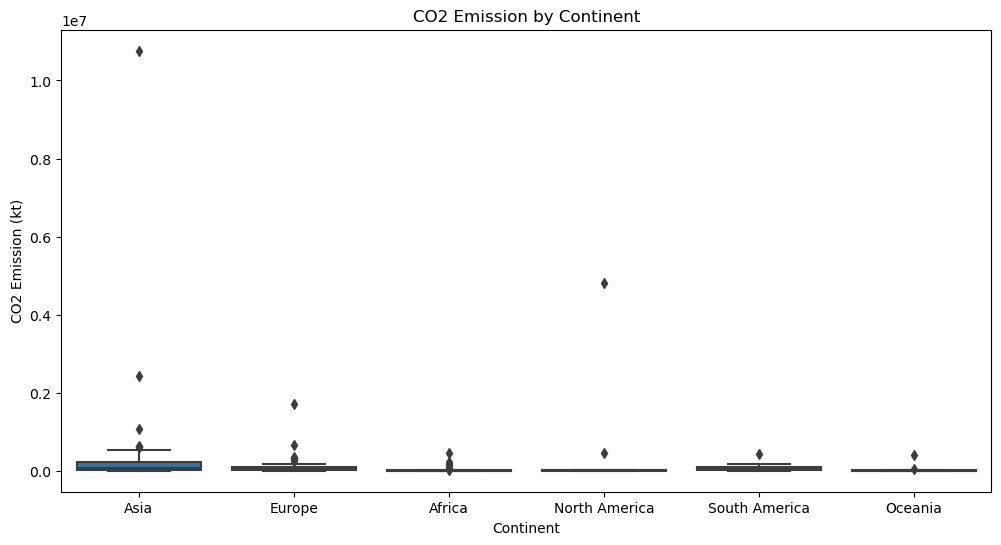

In [135]:
#same, outliers, use median.
plt.figure(figsize=(12, 6))
sns.boxplot(x="Continent", y="CO2kt", data=csv2019)
plt.title('CO2 Emission by Continent')
plt.xlabel('Continent')
plt.ylabel('CO2 Emission (kt)')
plt.show() 


In [40]:
#all replaced by median of each continent.
c_median = csv2019.groupby('Continent')[['HealthPC$', 'CO2kt']].median()
print(c_median)

for continent in c_median.index:
    csv2019.loc[(csv2019['Continent'] == continent) & (csv2019['HealthPC$'].isnull()), 'HealthPC$'] = c_median.loc[continent, 'HealthPC$']
    csv2019.loc[(csv2019['Continent'] == continent) & (csv2019['CO2kt'].isnull()), 'CO2kt'] = c_median.loc[continent, 'CO2kt']
missValue = csv2019.isnull().sum()
print(missValue)  

                 HealthPC$     CO2kt
Continent                           
Africa           66.605190   5075.50
Asia            294.460083  69270.55
Europe         2219.100586  37661.60
North America   500.883667   6522.30
Oceania         234.538033    291.75
South America   504.940353  48301.80
No            0
Country       0
Continent     0
LifeExpect    0
GDPPC         0
MfgMn$        0
AgriMn$       0
CO2kt         0
HealthPC$     0
Pop_mn        0
dtype: int64


In [42]:
# save to EconomicIndicators2019_cleaned excel file.
csv2019.to_excel('EconomicIndicators2019_cleaned.xlsx')  


## problem 2-2

In [125]:
#read excel
csv2020 = pd.read_excel("EconomicIndicators2020.xlsx")   
csv2020.head()

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,62.58,516.87,1546.26,5402.59,8709.47,80.29,38.97
1,2,Albania,Europe,76.99,5343.04,933.42,2915.07,4383.20,NaN,2.84
2,3,Algeria,Africa,74.45,3354.16,27257.32,20089.32,161563.00,214.85,43.45
3,4,Angola,Africa,62.26,1502.95,3548.57,4997.28,19814.50,50.74,33.43
4,5,Antigua and Barbuda,North America,78.84,15284.77,29.88,30.34,474.60,830.34,0.09


In [48]:
#preprocessing for excel of 2020
continents2 = csv2020['Continent'].unique()
print(continents2)
duplicates2 = csv2019.duplicated().sum()
print(duplicates2)
negative2= (csv2019[['GDPPC', 'MfgMn$', 'AgriMn$', 'CO2kt', 'HealthPC$', 'Pop_mn']] < 0).sum()
print(negative2)  
#no problem here.

['Asia' 'Europe' 'Africa' 'North America' 'South America' 'Oceania']
0
GDPPC        0
MfgMn$       0
AgriMn$      0
CO2kt        0
HealthPC$    0
Pop_mn       0
dtype: int64


In [45]:
csv2020.info() #missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


In [49]:
#all replaced by median of each continent.
c_median2 = csv2020.groupby('Continent')[['HealthPC$', 'CO2kt']].median()
print(c_median2)

for continent in c_median2.index:
    csv2020.loc[(csv2020['Continent'] == continent) & (csv2020['HealthPC$'].isnull()), 'HealthPC$'] = c_median2.loc[continent, 'HealthPC$']
    csv2020.loc[(csv2020['Continent'] == continent) & (csv2020['CO2kt'].isnull()), 'CO2kt'] = c_median2.loc[continent, 'CO2kt']
missValue = csv2020.isnull().sum()
print(missValue)  

               HealthPC$     CO2kt
Continent                         
Africa            60.930   4943.55
Asia             305.090  64756.65
Europe          2341.640  36177.40
North America    514.825   5208.90
Oceania          225.235    214.90
South America    477.900  40504.95
No            0
Country       0
Continent     0
LifeExpect    0
GDPPC         0
MfgMn$        0
AgriMn$       0
CO2kt         0
HealthPC$     0
Pop_mn        0
dtype: int64


In [53]:
#merge two excel files for further analysis
mergedcsv = pd.merge(csv2019, csv2020, on='Country', suffixes=('_2019', '_2020'))
mergedcsv.head()

,No_2019,Country,Continent_2019,LifeExpect_2019,GDPPC_2019,MfgMn$_2019,AgriMn$_2019,CO2kt_2019,HealthPC$_2019,Pop_mn_2019,No_2020,Continent_2020,LifeExpect_2020,GDPPC_2020,MfgMn$_2020,AgriMn$_2020,CO2kt_2020,HealthPC$_2020,Pop_mn_2020
0,1,Afghanistan,Asia,63.565,500.522981,1331.48,4872.44,11238.83,74.234104,37.77,1,Asia,62.58,516.87,1546.26,5402.59,8709.47,80.29,38.97
1,2,Albania,Europe,79.282,5396.214227,963.57,2832.29,4993.30,2219.100586,2.85,2,Europe,76.99,5343.04,933.42,2915.07,4383.20,2341.64,2.84
2,3,Algeria,Africa,76.474,4021.983608,40980.38,21189.60,170582.40,250.560776,42.71,3,Africa,74.45,3354.16,27257.32,20089.32,161563.00,214.85,43.45
3,4,Angola,Africa,62.448,2142.238757,4253.81,5463.38,24382.90,69.379341,32.35,4,Africa,62.26,1502.95,3548.57,4997.28,19814.50,50.74,33.43
4,5,Antigua and Barbuda,North America,78.691,18187.779712,37.48,29.25,509.00,801.543823,0.09,5,North America,78.84,15284.77,29.88,30.34,474.60,830.34,0.09


In [127]:
#show an overview of economy-related factors first.
c_mean = mergedcsv.groupby('Continent_2019')[['GDPPC_2019','GDPPC_2020',
                                                'MfgMn$_2019', 'MfgMn$_2020',
                                                'AgriMn$_2019', 'AgriMn$_2020',
                                            ]].mean()
c_mean

,GDPPC_2019,GDPPC_2020,MfgMn$_2019,MfgMn$_2020,AgriMn$_2019,AgriMn$_2020
Continent_2019,,,,,,
Africa,2889.859188,2523.492727,7058.542273,6771.841818,8122.603182,8628.902045
Asia,16017.362660,13673.086000,154172.773333,152832.739556,48106.197333,51289.514222
Europe,37803.197034,37025.550465,70023.700233,67049.763721,8508.801163,8612.108605
North America,18894.301037,16769.802800,107982.234000,101584.795600,10155.142000,10918.996400
Oceania,12818.371198,12227.537000,10004.121000,9592.150000,4733.209000,4471.592000
South America,8691.767025,7653.437000,37783.642000,32276.434000,17331.682000,17715.087000


In [112]:
#prepare for creating graph
GDP = pd.melt(mergedcsv, id_vars='Continent_2019',
                value_vars=['GDPPC_2019', 'GDPPC_2020'],
                var_name='Year', value_name='GDPPC')
GDP['Year'] = GDP['Year'].str.replace('GDPPC_', '')

MFG = pd.melt(mergedcsv, id_vars='Continent_2019',
                value_vars=['MfgMn$_2019', 'MfgMn$_2020'],
                var_name='Year', value_name='MfgMn$')
MFG['Year'] = MFG['Year'].str.replace('MfgMn$_', '')

AGRI = pd.melt(mergedcsv, id_vars='Continent_2019',
                value_vars=['AgriMn$_2019', 'AgriMn$_2020'],
                var_name='Year', value_name='AgriMn$')
AGRI['Year'] = AGRI['Year'].str.replace('AgriMn$_', '')

CO2 = pd.melt(mergedcsv, id_vars='Continent_2019',
                value_vars=['CO2kt_2019', 'CO2kt_2020'],
                var_name='Year', value_name='CO2kt')
CO2['Year'] = CO2['Year'].str.replace('CO2kt_', '')

Heal = pd.melt(mergedcsv, id_vars='Continent_2019',
                value_vars=['HealthPC$_2019', 'HealthPC$_2020'],
                var_name='Year', value_name='HealthPC$')
Heal['Year'] = Heal['Year'].str.replace('HealthPC$_', '')

    Continent_2019  Year         GDPPC
0             Asia  2019    500.522981
1           Europe  2019   5396.214227
2           Africa  2019   4021.983608
3           Africa  2019   2142.238757
4    North America  2019  18187.779712
..             ...   ...           ...
349           Asia  2020   1759.310000
350           Asia  2020   3586.350000
351           Asia  2020   3233.570000
352         Africa  2020    956.830000
353         Africa  2020   1372.700000

[354 rows x 3 columns]


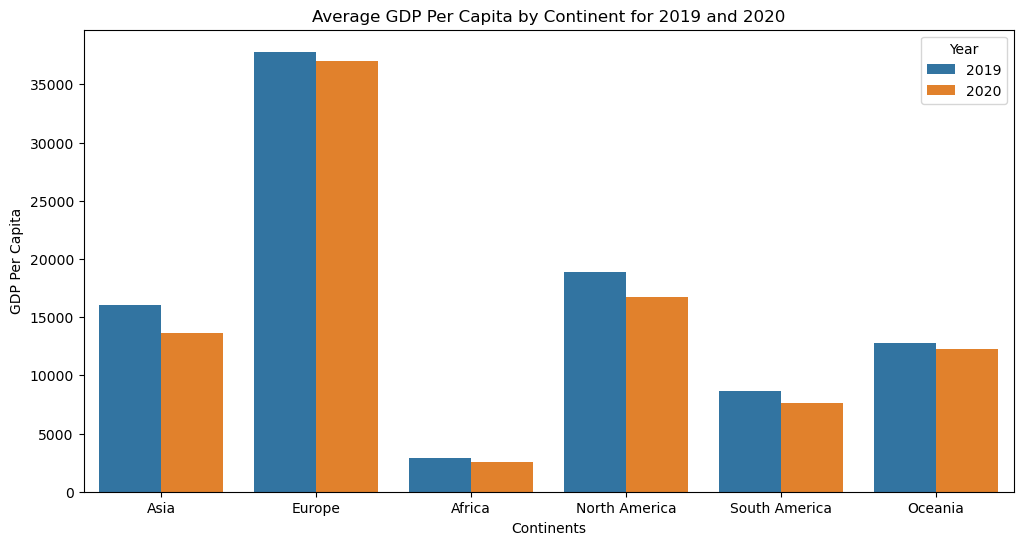

In [84]:
# bar chart of avg GDPPC
plt.figure(figsize=(12, 6))
sns.barplot(data=GDP, x='Continent_2019', y='GDPPC', hue='Year', errorbar=None)
plt.title('Average GDP Per Capita by Continent for 2019 and 2020')
plt.xlabel('Continents')
plt.ylabel('GDP Per Capita')
plt.legend(title='Year')
plt.show()

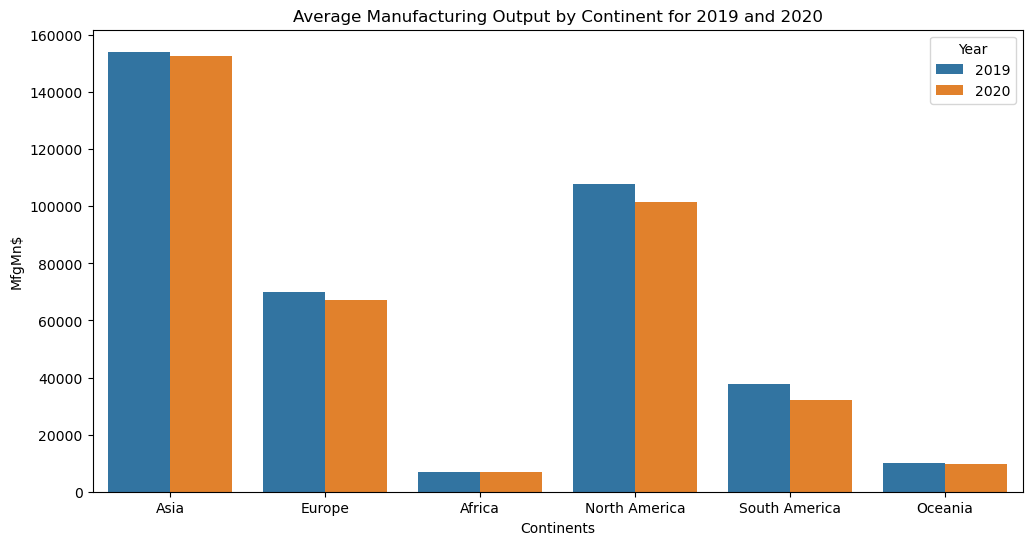

In [114]:
# bar chart of avg MfgMn$
plt.figure(figsize=(12, 6))
sns.barplot(data=MFG, x='Continent_2019', y='MfgMn$', hue='Year', errorbar=None)
plt.title('Average Manufacturing Output by Continent for 2019 and 2020')
plt.xlabel('Continents')
plt.ylabel('MfgMn$')
plt.legend(title='Year')
plt.show()

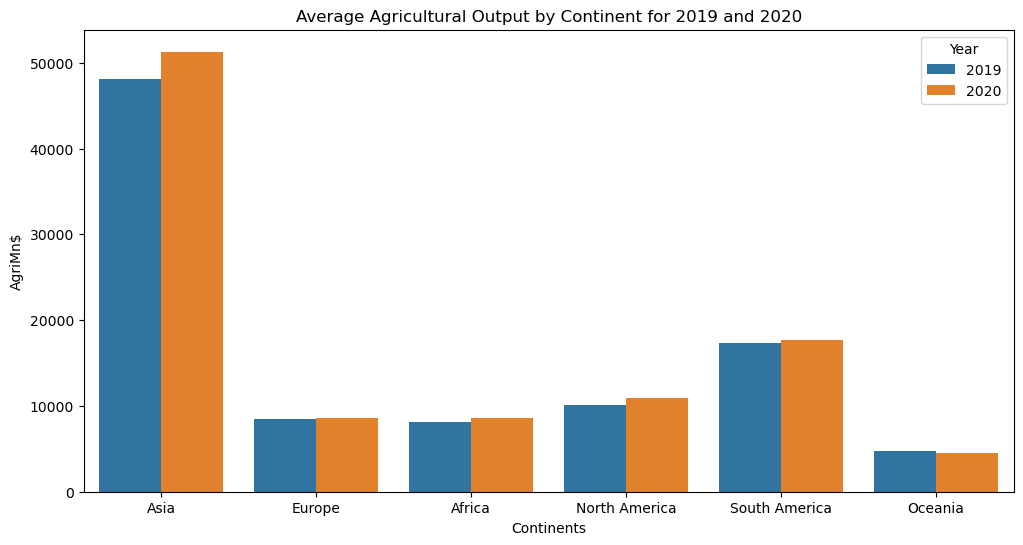

In [115]:
# bar chart of avg AgriMn$
plt.figure(figsize=(12, 6))
sns.barplot(data=AGRI, x='Continent_2019', y='AgriMn$', hue='Year', errorbar=None)
plt.title('Average Agricultural Output by Continent for 2019 and 2020')
plt.xlabel('Continents')
plt.ylabel('AgriMn$')
plt.legend(title='Year')
plt.show()

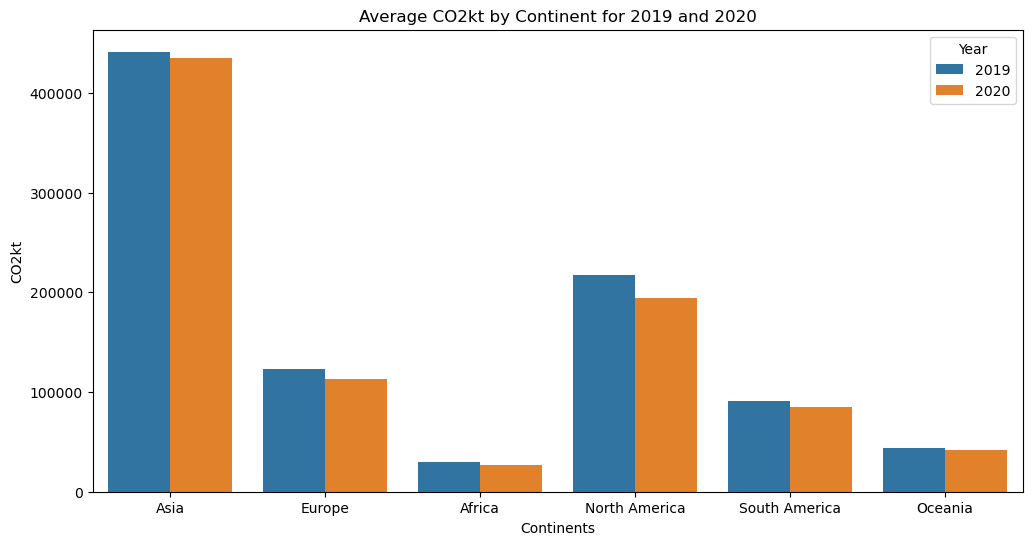

In [126]:
# bar chart of avg CO2 emission
plt.figure(figsize=(12, 6))
sns.barplot(data=CO2, x='Continent_2019', y='CO2kt', hue='Year', errorbar=None)
plt.title('Average CO2kt by Continent for 2019 and 2020')
plt.xlabel('Continents')
plt.ylabel('CO2kt')
plt.legend(title='Year')
plt.show()

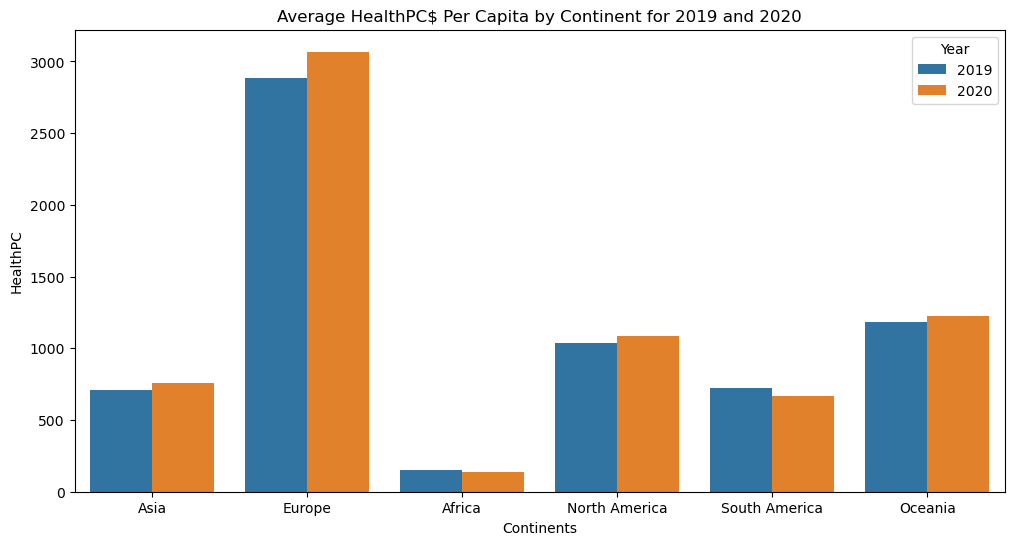

In [105]:
# bar chart of avg HealthPC$   #didn't used in report
plt.figure(figsize=(12, 6))
sns.barplot(data=Heal, x='Continent_2019', y='HealthPC$', hue='Year', errorbar=None)
plt.title('Average HealthPC$ Per Capita by Continent for 2019 and 2020')
plt.xlabel('Continents')
plt.ylabel('HealthPC')
plt.legend(title='Year')
plt.show()

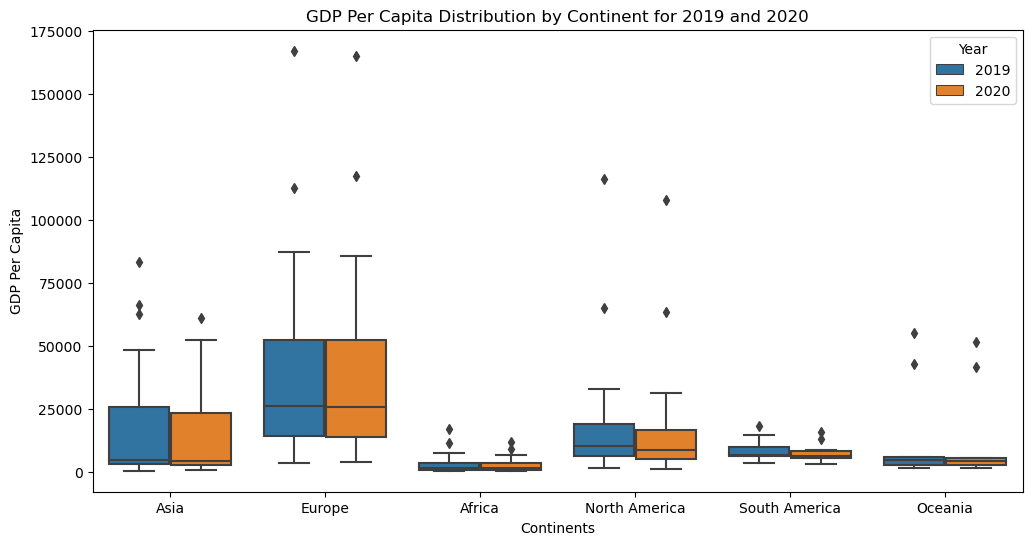

In [118]:
# box chart of GDPPC
plt.figure(figsize=(12, 6))
sns.boxplot(data=GDP, x='Continent_2019', y='GDPPC', hue='Year')
plt.title('GDP Per Capita Distribution by Continent for 2019 and 2020')
plt.xlabel('Continents')
plt.ylabel('GDP Per Capita')
plt.legend(title='Year')
plt.show()